## Libraries

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from scipy.stats import norm

import warnings
warnings.filterwarnings(action="ignore")
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

## Get data

In [41]:
train = pd.read_csv("../train.csv",index_col = "Id")
test = pd.read_csv("../test.csv",index_col = "Id")
train.shape, test.shape

((1460, 80), (1459, 79))

## Target Variable

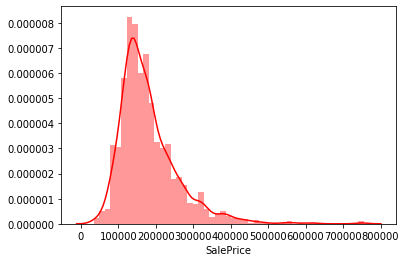

In [43]:
# our target variable is SalePrice
sns.distplot(train['SalePrice'], color='Red');

The target variable is <b>skewed right</b>. We should use a power transformation to make it evenly distributed. Powers < 1 are good for transforming data that is skewed right. This will be done in feature engineering.

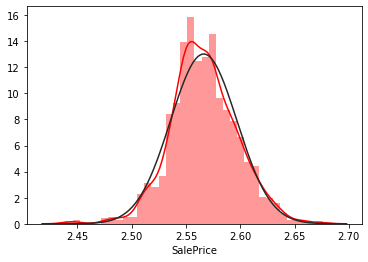

In [54]:
train["SalePrice"] = np.log1p(train["SalePrice"])
sns.distplot(train['SalePrice'], color='Red', fit=norm);

## Features

In [55]:
# what are the categorical features?
train_cat = train.select_dtypes(include=['object']).columns.tolist()
res = map(lambda x: train[x].value_counts(), train_cat)

# what are the numerical features?
train_num = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
res2 = map(lambda x: train[x].value_counts(), train_num)

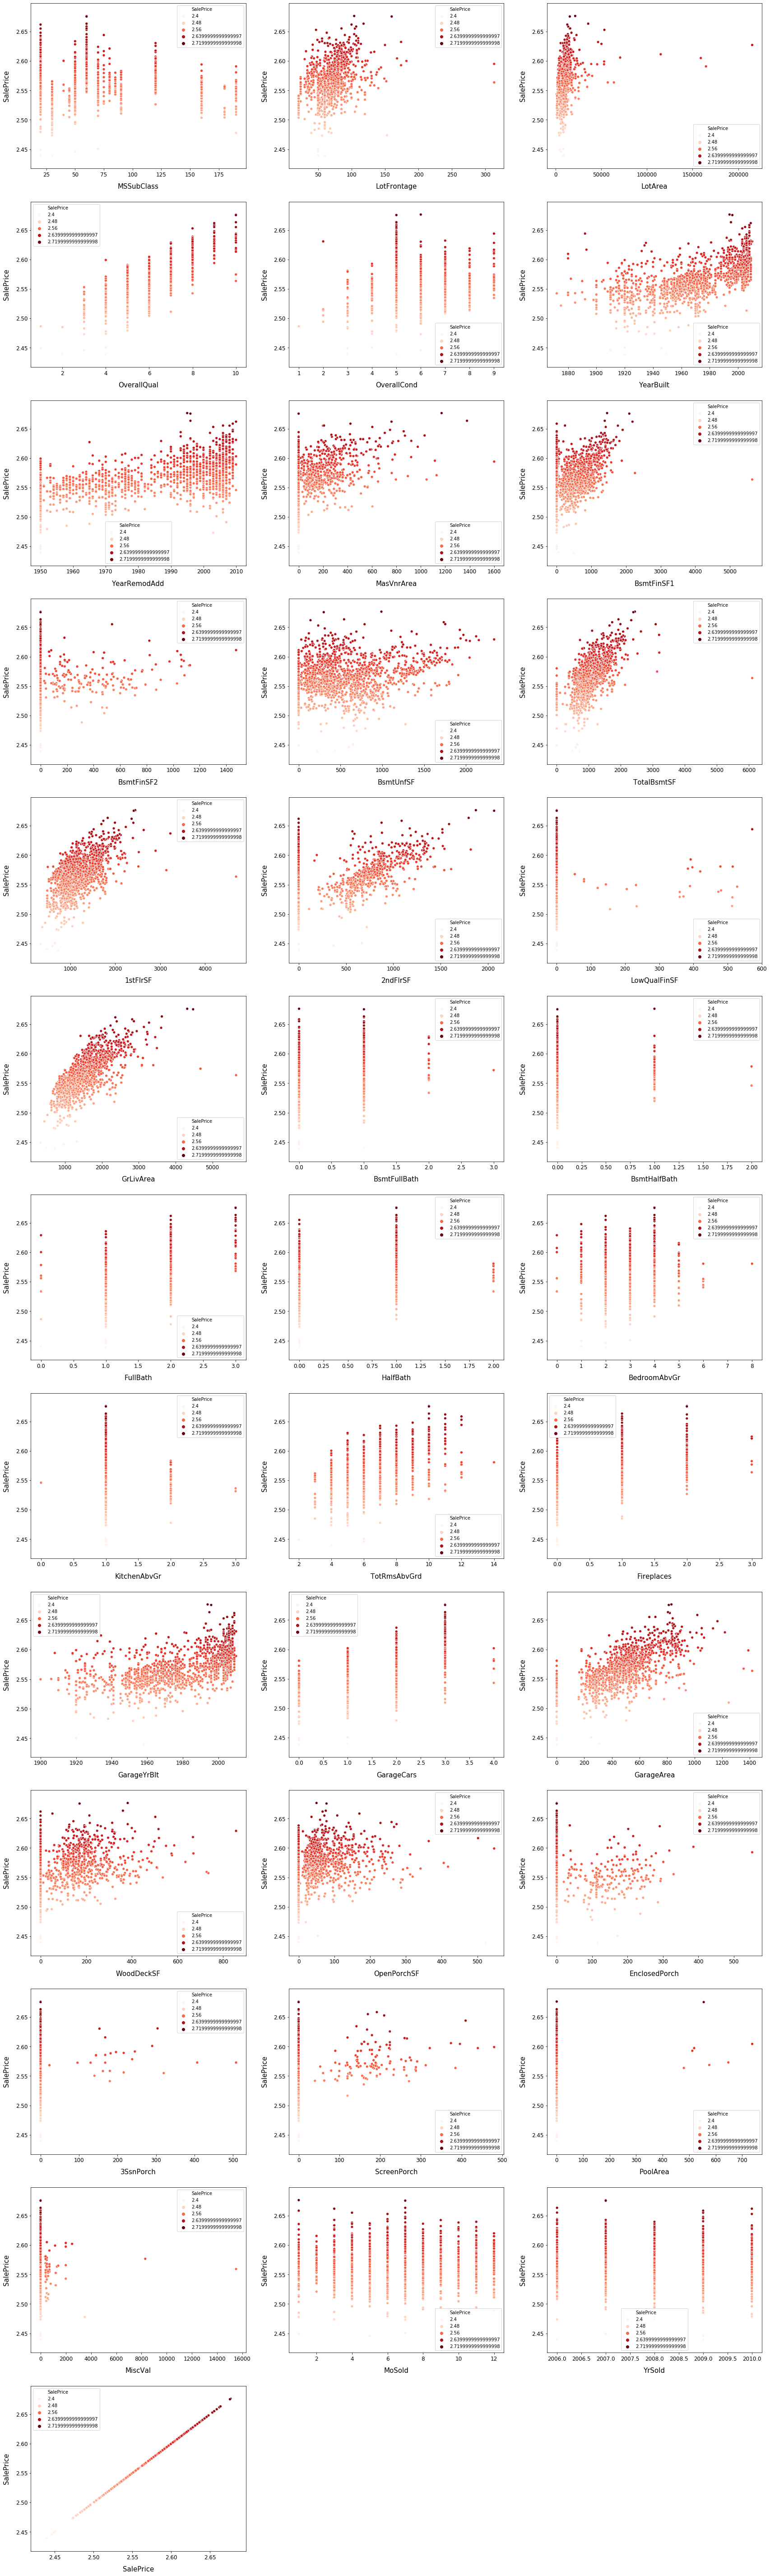

In [56]:
# numeric features
numeric = []
for i in train.columns:
    if train[i].dtype in ['int64', 'float64']:
        numeric.append(i)  
        
# visualising features with SalePrice
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 120))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

for i, feature in enumerate(list(train[numeric]), 1):
    plt.subplot(len(list(numeric)), 3, i)
    sns.scatterplot(x=feature, y='SalePrice', hue='SalePrice', palette='Reds', data=train)
        
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('SalePrice', size=15, labelpad=12.5)
    
    for j in range(2):
        plt.tick_params(axis='x', labelsize=12)
        plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(loc='best', prop={'size': 10})
        
plt.show()

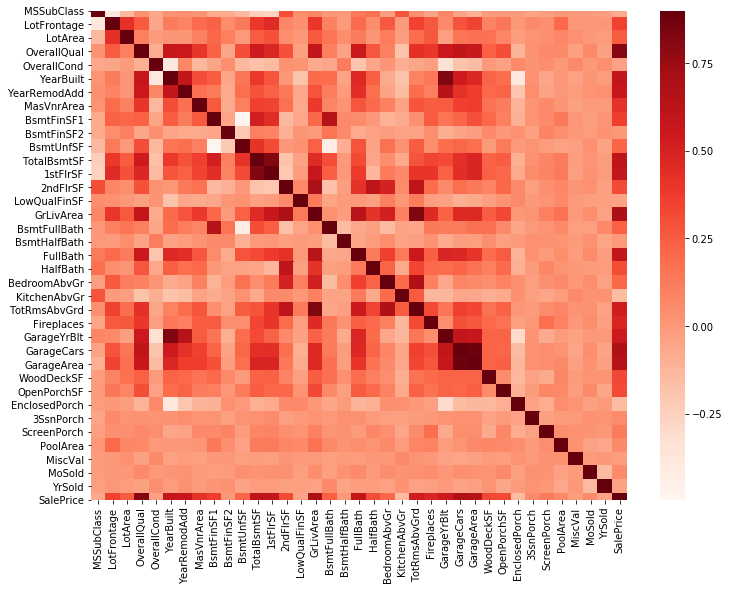

In [66]:
#Correlation features vs SalePrice
corr = train.corr()

plt.subplots(figsize=(12,9))
sns.heatmap(corr, vmax=0.9, cmap='Reds')

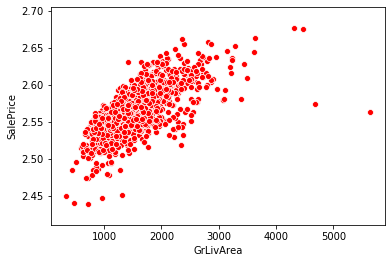

In [70]:
sns.scatterplot(data = train, x = "GrLivArea", y = "SalePrice", color='Red');

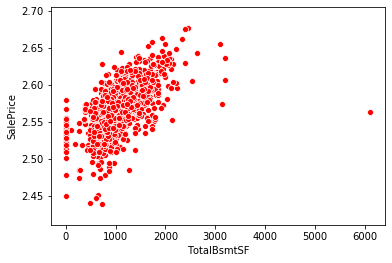

In [71]:
sns.scatterplot(data = train, x = "TotalBsmtSF", y = "SalePrice", color='R');

Removing outliers

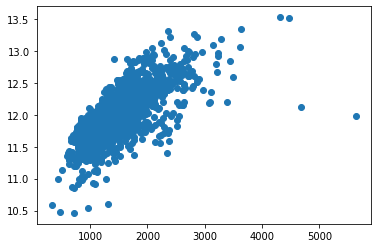

In [12]:
fig, ax = plt.subplots()
ax.scatter(x = train_df['GrLivArea'], y = train_df['SalePrice'])
plt.show()

In [13]:
train_df.drop(train_df[train_df["GrLivArea"] > 4000].index, inplace=True)